3. Demonstrate the usage of dropout and gradient clipping in a neural network training scenario.

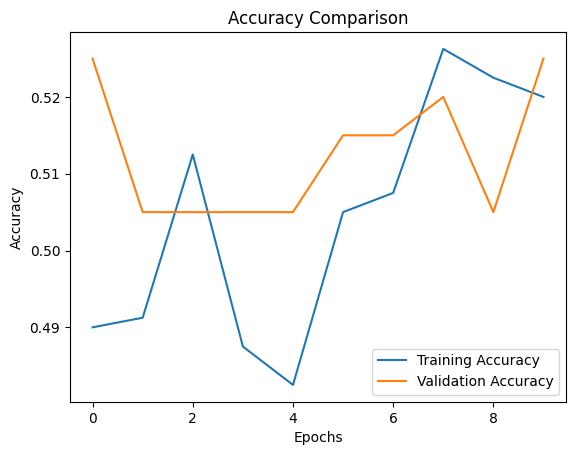

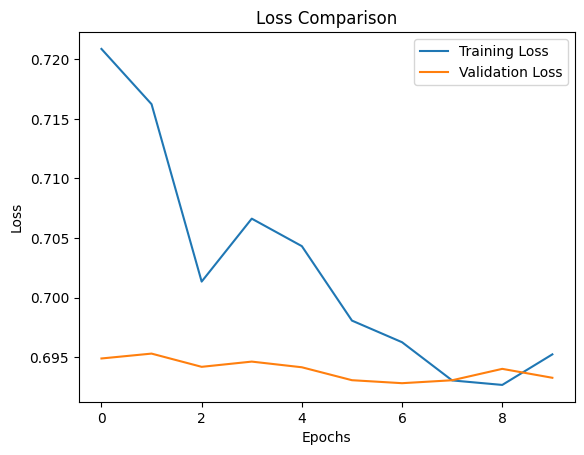

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Generate random data
np.random.seed(42)
X = np.random.rand(1000, 10)  # 1000 samples, 10 features
y = np.random.randint(2, size=(1000, 1))  # Binary labels (0 or 1)

# Split data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Define neural network with dropout and gradient clipping
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dropout(0.5),  # Dropout layer with a dropout rate of 0.2
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer with a dropout rate of 0.2
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Gradient clipping with norm value of 1.0
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
